<a href="https://colab.research.google.com/github/RafaelCaballero/Julio24/blob/main/code/proyecto6Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a la ciencia de datos con Python
Rafa Caballero

## Proyecto 6, regresión logística

Comenzamos cargando algunos datos


In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np

valores = ["AAPL","AMZN","GOOG","NFLX","MSFT","SHEL","LLY"]
for v in valores:
    #print(v)
    df = yf.download(v,
                          start='2008-01-01',
                          end='2024-06-30')

    # además lo renombramos
    df.columns = [c+"_"+v for c in df.columns]
    if v==valores[0]:
        df_total = df
    else:
        df_total = pd.concat([df_total, df], axis=1)

df_total = df_total.pct_change().dropna()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Marcamos con 1 las columnas en las que AAPL-Close supera la media de la serie histórica

In [ ]:
filtro = df_total["Close_AAPL"]> df_total["Close_AAPL"].mean()
df_total.loc[filtro,"label"]=1
df_total.loc[~filtro,"label"]=0
# la ponemos la primera para que se vea mejor
first_column = df_total.pop('label')
df_total.insert(0, 'label', first_column)
df_total

,label,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Adj Close_AAPL,Volume_AAPL,Open_AMZN,High_AMZN,Low_AMZN,...,Low_SHEL,Close_SHEL,Adj Close_SHEL,Volume_SHEL,Open_LLY,High_LLY,Low_LLY,Close_LLY,Adj Close_LLY,Volume_LLY
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-03,0.0,-0.019371,-0.014331,0.000727,0.000462,0.000462,-0.219716,0.007446,-0.001847,-0.001901,...,0.004601,0.021411,0.021411,-0.273871,-0.013842,-0.011528,0.007853,0.008373,0.008373,-0.187770
2008-01-04,0.0,-0.020265,-0.022240,-0.071618,-0.076335,-0.076335,0.728880,-0.029148,-0.039589,-0.063690,...,0.000238,-0.020263,-0.020264,0.106863,-0.003414,-0.006208,-0.017864,-0.022457,-0.022457,0.370696
2008-01-07,0.0,-0.053278,-0.048705,-0.048410,-0.013385,-0.013385,0.423374,-0.049753,-0.030300,-0.034237,...,0.015341,0.024605,0.024605,1.020228,-0.006281,0.035964,0.009481,0.053089,0.053089,0.677217
2008-01-08,0.0,-0.006124,-0.006209,0.003348,-0.035972,-0.035972,-0.264636,-0.012074,0.013912,0.017082,...,-0.028344,-0.035963,-0.035963,-0.260416,0.049990,0.045496,0.042937,0.027681,0.027681,0.175577
2008-01-09,1.0,-0.049073,-0.016223,-0.014637,0.047591,0.047591,0.190355,0.000114,-0.043885,-0.076958,...,0.003978,0.013839,0.013839,-0.063244,0.022437,-0.001573,0.030142,0.014270,0.014271,-0.214832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,1.0,-0.012691,0.003823,-0.002511,0.003133,0.003133,-0.672403,0.008147,0.009087,-0.002852,...,0.010890,0.021161,0.021161,0.107094,0.004878,0.013016,0.003569,0.007048,0.007048,-0.165425
2024-06-25,1.0,0.006884,-0.006206,0.009778,0.004468,0.004468,-0.297461,-0.013310,-0.011309,0.000486,...,0.009497,0.001820,0.001820,-0.300168,0.002011,0.006463,0.009695,0.016290,0.016290,-0.013342
2024-06-26,1.0,0.011236,0.016463,0.009731,0.019993,0.019993,0.167495,0.000589,0.031561,0.004530,...,-0.010390,-0.009644,-0.009644,0.891806,0.013714,-0.003376,0.007112,-0.003703,-0.003703,-0.213994


**Ejercicio**

Intentar enteder las siguientes instrucciones ¿qué efecto tienen? (pista: fijarse en la columna "label")

In [ ]:
df = df_total.copy()

f = 2
df.iloc[0:-f,0] = df.iloc[f:,0]
df = df.iloc[0:-f]
df

,label,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Adj Close_AAPL,Volume_AAPL,Open_AMZN,High_AMZN,Low_AMZN,...,Low_SHEL,Close_SHEL,Adj Close_SHEL,Volume_SHEL,Open_LLY,High_LLY,Low_LLY,Close_LLY,Adj Close_LLY,Volume_LLY
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-03,0.0,-0.019371,-0.014331,0.000727,0.000462,0.000462,-0.219716,0.007446,-0.001847,-0.001901,...,0.004601,0.021411,0.021411,-0.273871,-0.013842,-0.011528,0.007853,0.008373,0.008373,-0.187770
2008-01-04,0.0,-0.020265,-0.022240,-0.071618,-0.076335,-0.076335,0.728880,-0.029148,-0.039589,-0.063690,...,0.000238,-0.020263,-0.020264,0.106863,-0.003414,-0.006208,-0.017864,-0.022457,-0.022457,0.370696
2008-01-07,0.0,-0.053278,-0.048705,-0.048410,-0.013385,-0.013385,0.423374,-0.049753,-0.030300,-0.034237,...,0.015341,0.024605,0.024605,1.020228,-0.006281,0.035964,0.009481,0.053089,0.053089,0.677217
2008-01-08,1.0,-0.006124,-0.006209,0.003348,-0.035972,-0.035972,-0.264636,-0.012074,0.013912,0.017082,...,-0.028344,-0.035963,-0.035963,-0.260416,0.049990,0.045496,0.042937,0.027681,0.027681,0.175577
2008-01-09,0.0,-0.049073,-0.016223,-0.014637,0.047591,0.047591,0.190355,0.000114,-0.043885,-0.076958,...,0.003978,0.013839,0.013839,-0.063244,0.022437,-0.001573,0.030142,0.014270,0.014271,-0.214832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-21,1.0,-0.016547,-0.010969,-0.008331,-0.010444,-0.010444,1.859629,0.026734,0.014852,0.017185,...,-0.001859,-0.001285,-0.001285,0.039176,-0.008220,-0.014888,0.011113,-0.002382,-0.002382,0.026399
2024-06-24,1.0,-0.012691,0.003823,-0.002511,0.003133,0.003133,-0.672403,0.008147,0.009087,-0.002852,...,0.010890,0.021161,0.021161,0.107094,0.004878,0.013016,0.003569,0.007048,0.007048,-0.165425
2024-06-25,1.0,0.006884,-0.006206,0.009778,0.004468,0.004468,-0.297461,-0.013310,-0.011309,0.000486,...,0.009497,0.001820,0.001820,-0.300168,0.002011,0.006463,0.009695,0.016290,0.016290,-0.013342


Solución: se emparejan los resultados de un día con la etiqueta label del día siguiente, de esta forma se busca predecir el incremento de Close_Appl

**Ejercicio**
Eliminar de df todas las columnas relacionadas con AAPL, porque lo que buscamos es ver si Apple va a tener un incremento a partir del resto. Se puede escribir el nombre de las columnas a borrar a mano

In [ ]:
print(df.columns)
# Solución

# Versión 1
cols = ['Open_AAPL', 'High_AAPL', 'Low_AAPL', 'Close_AAPL',
       'Adj Close_AAPL', 'Volume_AAPL', 'Open_AMZN', 'High_AMZN', 'Low_AMZN']
# versión 2
cols = [c for c in df.columns if "AAPL" in c]
print(cols)

df = df.drop(columns=cols)
df


Index(['label', 'Open_AAPL', 'High_AAPL', 'Low_AAPL', 'Close_AAPL',
       'Adj Close_AAPL', 'Volume_AAPL', 'Open_AMZN', 'High_AMZN', 'Low_AMZN',
       'Close_AMZN', 'Adj Close_AMZN', 'Volume_AMZN', 'Open_GOOG', 'High_GOOG',
       'Low_GOOG', 'Close_GOOG', 'Adj Close_GOOG', 'Volume_GOOG', 'Open_NFLX',
       'High_NFLX', 'Low_NFLX', 'Close_NFLX', 'Adj Close_NFLX', 'Volume_NFLX',
       'Open_MSFT', 'High_MSFT', 'Low_MSFT', 'Close_MSFT', 'Adj Close_MSFT',
       'Volume_MSFT', 'Open_SHEL', 'High_SHEL', 'Low_SHEL', 'Close_SHEL',
       'Adj Close_SHEL', 'Volume_SHEL', 'Open_LLY', 'High_LLY', 'Low_LLY',
       'Close_LLY', 'Adj Close_LLY', 'Volume_LLY'],
      dtype='object')
['Open_AAPL', 'High_AAPL', 'Low_AAPL', 'Close_AAPL', 'Adj Close_AAPL', 'Volume_AAPL']


,label,Open_AMZN,High_AMZN,Low_AMZN,Close_AMZN,Adj Close_AMZN,Volume_AMZN,Open_GOOG,High_GOOG,Low_GOOG,...,Low_SHEL,Close_SHEL,Adj Close_SHEL,Volume_SHEL,Open_LLY,High_LLY,Low_LLY,Close_LLY,Adj Close_LLY,Volume_LLY
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-03,0.0,0.007446,-0.001847,-0.001901,-0.010805,-0.010805,-0.341749,-0.010983,-0.015085,-0.001785,...,0.004601,0.021411,0.021411,-0.273871,-0.013842,-0.011528,0.007853,0.008373,0.008373,-0.187770
2008-01-04,0.0,-0.029148,-0.039589,-0.063690,-0.067430,-0.067430,0.125788,-0.008128,-0.008575,-0.031810,...,0.000238,-0.020263,-0.020264,0.106863,-0.003414,-0.006208,-0.017864,-0.022457,-0.022457,0.370696
2008-01-07,0.0,-0.049753,-0.030300,-0.034237,0.000338,0.000338,-0.028082,-0.037885,-0.027432,-0.026947,...,0.015341,0.024605,0.024605,1.020228,-0.006281,0.035964,0.009481,0.053089,0.053089,0.677217
2008-01-08,1.0,-0.012074,0.013912,0.017082,-0.010583,-0.010583,0.230594,-0.001437,-0.003503,-0.009963,...,-0.028344,-0.035963,-0.035963,-0.260416,0.049990,0.045496,0.042937,0.027681,0.027681,0.175577
2008-01-09,0.0,0.000114,-0.043885,-0.076958,-0.030269,-0.030269,0.336033,-0.035161,-0.010031,-0.013455,...,0.003978,0.013839,0.013839,-0.063244,0.022437,-0.001573,0.030142,0.014270,0.014271,-0.214832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-21,1.0,0.026734,0.014852,0.017185,0.016013,0.016013,0.630606,0.010073,0.021103,0.009067,...,-0.001859,-0.001285,-0.001285,0.039176,-0.008220,-0.014888,0.011113,-0.002382,-0.002382,0.026399
2024-06-24,1.0,0.008147,0.009087,-0.002852,-0.018564,-0.018564,-0.306059,0.015631,-0.002367,0.012187,...,0.010890,0.021161,0.021161,0.107094,0.004878,0.013016,0.003569,0.007048,0.007048,-0.165425
2024-06-25,1.0,-0.013310,-0.011309,0.000486,0.004149,0.004149,-0.093101,-0.000745,0.020156,0.004855,...,0.009497,0.001820,0.001820,-0.300168,0.002011,0.006463,0.009695,0.016290,0.016290,-0.013342


**Ejercicio**

Utilizar regresión logística para intentar determinar label a partir del resto de columnas en df. Se puede utilizar la siguiente función para mostrar los resultados:

In [1]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
def evaluar(y_test,y_pred):
  k =  cohen_kappa_score(y_test,y_pred)
  print("kappa ",k)
  cm = confusion_matrix(y_test, y_pred, labels=modelo.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=modelo.classes_)
  disp.plot()

  plt.show()

  print(classification_report(y_test, y_pred))
  return k,cm

kappa  0.0013061738095480058


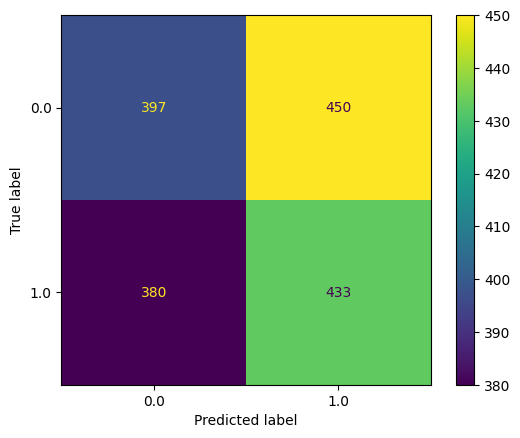

              precision    recall  f1-score   support

         0.0       0.51      0.47      0.49       847
         1.0       0.49      0.53      0.51       813

    accuracy                           0.50      1660
   macro avg       0.50      0.50      0.50      1660
weighted avg       0.50      0.50      0.50      1660



(0.0013061738095480058,
 array([[397, 450],
        [380, 433]]))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer,f1_score, accuracy_score, recall_score,cohen_kappa_score

from sklearn.linear_model import LogisticRegression

### Solución
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# 1 dividir columnas
yColumn = "label"
XColumns = [c for c in df.columns if c!=yColumn]
X = df[XColumns]
y = df[yColumn]

# 2 preparar train y test
test = 0.4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test)

# 3 método y entrenamiento
metodo = LogisticRegression(max_iter=1000)
modelo = metodo.fit(X_train,y_train)

# 4 evaluar
y_pred = modelo.predict(X_test)
evaluar(y_test,y_pred)




In [ ]:
df.label.value_counts()

label
0.0    2089
1.0    2060
Name: count, dtype: int64

¿Cuál es el peor valor entre precision y recall que se obtiene? ¿qué indica? ¿a qué puede deberse?

El resultado es bastante malo aunque las clases están equilibradas. Puede que regresión logística no sea adecuada en este caso. También habría que probar a escalar y quitar valores correlacionados

**Ejercicio**

PArtimos de los mismos datos:

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np

valores = ["AAPL","AMZN","GOOG","NFLX","MSFT","SHEL","LLY"]
for v in valores:
    #print(v)
    df = yf.download(v,
                          start='2008-01-01',
                          end='2024-06-30')

    # además lo renombramos
    df.columns = [c+"_"+v for c in df.columns]
    if v==valores[0]:
        df_total = df
    else:
        df_total = pd.concat([df_total, df], axis=1)

df_total = df_total.pct_change().dropna()
df_total

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Adj Close_AAPL,Volume_AAPL,Open_AMZN,High_AMZN,Low_AMZN,Close_AMZN,...,Low_SHEL,Close_SHEL,Adj Close_SHEL,Volume_SHEL,Open_LLY,High_LLY,Low_LLY,Close_LLY,Adj Close_LLY,Volume_LLY
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-03,-0.019371,-0.014331,0.000727,0.000462,0.000462,-0.219716,0.007446,-0.001847,-0.001901,-0.010805,...,0.004601,0.021411,0.021411,-0.273871,-0.013842,-0.011528,0.007853,0.008373,0.008373,-0.187770
2008-01-04,-0.020265,-0.022240,-0.071618,-0.076335,-0.076335,0.728880,-0.029148,-0.039589,-0.063690,-0.067430,...,0.000238,-0.020263,-0.020264,0.106863,-0.003414,-0.006208,-0.017864,-0.022457,-0.022457,0.370696
2008-01-07,-0.053278,-0.048705,-0.048410,-0.013385,-0.013385,0.423374,-0.049753,-0.030300,-0.034237,0.000338,...,0.015341,0.024605,0.024605,1.020228,-0.006281,0.035964,0.009481,0.053089,0.053089,0.677217
2008-01-08,-0.006124,-0.006209,0.003348,-0.035972,-0.035972,-0.264636,-0.012074,0.013912,0.017082,-0.010583,...,-0.028344,-0.035963,-0.035963,-0.260416,0.049990,0.045496,0.042937,0.027681,0.027681,0.175577
2008-01-09,-0.049073,-0.016223,-0.014637,0.047591,0.047591,0.190355,0.000114,-0.043885,-0.076958,-0.030269,...,0.003978,0.013839,0.013839,-0.063244,0.022437,-0.001573,0.030142,0.014270,0.014271,-0.214832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,-0.012691,0.003823,-0.002511,0.003133,0.003133,-0.672403,0.008147,0.009087,-0.002852,-0.018564,...,0.010890,0.021161,0.021161,0.107094,0.004878,0.013016,0.003569,0.007048,0.007048,-0.165425
2024-06-25,0.006884,-0.006206,0.009778,0.004468,0.004468,-0.297461,-0.013310,-0.011309,0.000486,0.004149,...,0.009497,0.001820,0.001820,-0.300168,0.002011,0.006463,0.009695,0.016290,0.016290,-0.013342
2024-06-26,0.011236,0.016463,0.009731,0.019993,0.019993,0.167495,0.000589,0.031561,0.004530,0.039015,...,-0.010390,-0.009644,-0.009644,0.891806,0.013714,-0.003376,0.007112,-0.003703,-0.003703,-0.213994


Ahora queremos obtener el incremento de Close_AAPL mediante regresión

En particular se propone:

1) Eliminar todas las columnas relacionadas con APPL excepto CLOSE_APPL

2) Usar regresión lineal para intentar calcularla

Se propone usar los 4 pasos (sin validación cruzada)

In [ ]:
#  Solución
cols = [c for c in df.columns if "AAPL" in c and c!="Close_AAPL"]

df = df.drop(columns=cols)


yColumn = "Close_AAPL"  # la y, siempre una única columna
XColumns = [c for c in df.columns if c!=yColumn ] # una lista de columnas: las X, las características, las features, las dimensiones...
# dividimos en dos; X será un dataframe, y una columna (tipo Series)
X = df[XColumns]
y = df[yColumn]


from sklearn.model_selection import train_test_split

test = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test)


from sklearn.linear_model import LinearRegression
metodo = LinearRegression()
modelo = metodo.fit(X_train,y_train)


from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test,y_pred)
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test,y_pred)
print(f"r^2: {round(r2,3)} RMSE: {round(rmse,3)}, MAE:{round(mae,3)}")


KeyError: 'Close_AAPL'

**Ejercicio**

Examinar los coeficientes del modelo ¿Qué indican?






In [ ]:

modelo.intercept_, modelo.coef_

**Ejercicio**

Hacerlo ahora con validación cruzada

**Ejercicio**

Probar algún otro método de regresión como RandomForestRegressor o GradientBoostingRegressor ¿se mejora el error?